<a href="https://colab.research.google.com/github/sverdoot/ML-notebooks/blob/master/higgs_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

In [0]:
df_train_raw = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ИППИ/training.csv")
#df_train_raw = df_train_raw.astype('float64')

FileNotFoundError: ignored

In [0]:
#df_test = pd.read_csv('./test.csv')

In [0]:
#def preprocess(data, ):
#    upd_data = data.copy()
#    upd_data = upd_data.drop('EventId', axis=1)
    

In [0]:
df_train_raw[:5]

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


Распределение по классам

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


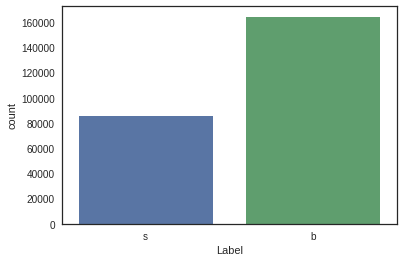

In [0]:
sns.countplot(x='Label',data=df_train_raw)

In [0]:
train_descr = df_train_raw.describe()
train_descr

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


Пропусков нет. Неизвестные значения заменены на -999.

### Look at the data

In [0]:
df = df_train_raw.copy()
df.Label = df_train_raw.Label == 's'
df = df.drop('EventId', axis=1)
df[df == -999.] = None

Отнормируем данные (не inplace).

In [0]:
df_scal = df.copy()
mins = train_descr.loc['min'][1:]
stds = train_descr.loc['std'][1:]
df_scal.fillna(method='ffill', inplace = True)
df_scal[df.columns[:-1]] = (df_scal[df.columns[:-1]] - mins) / (stds + 1e-5)

In [0]:
df_scal[:5]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,2.799267,1.461456,2.241022,0.439552,2.200116,1.707839,2.211086,3.647877,1.882416,1.310700,...,2.046169,2.000956,2.045926,2.042458,2.177777,2.206162,2.197947,1.157947,0.000614,True
1,2.854557,1.945627,2.373477,0.756350,2.200116,1.707839,2.211086,4.170280,0.093295,0.683222,...,1.023085,1.961161,2.043014,2.043917,2.177777,2.206162,2.197947,0.471618,1.190372,False
2,2.854557,4.588272,2.929900,0.559809,2.200116,1.707839,2.211086,3.755168,0.419153,1.311167,...,1.023085,1.957456,2.045728,2.037406,2.177777,2.206162,2.197947,0.451469,1.251064,False
3,2.812642,2.303501,1.827489,0.006504,2.200116,1.707839,2.211086,3.962085,0.018587,0.258102,...,0.000000,1.957456,2.045728,2.037406,2.177777,2.206162,2.197947,-0.000000,2.903759,False
4,2.891292,0.478570,3.146708,0.257715,2.200116,1.707839,2.211086,4.704178,0.736525,0.102665,...,0.000000,1.957456,2.045728,2.037406,2.177777,2.206162,2.197947,0.000000,3.329842,False


Посмотрим, как признаки скорреллированы между собой и с таргет значением. 

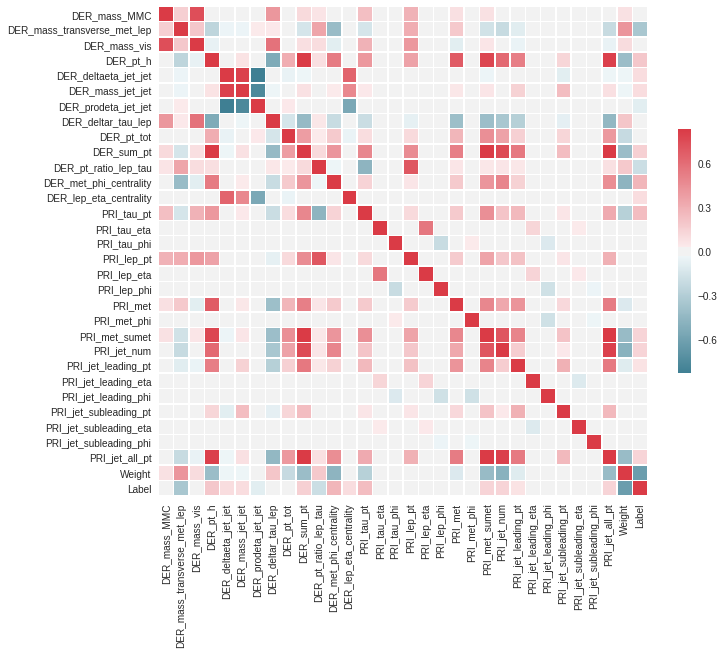

In [0]:
sns.set(style="white")

# Compute the correlation matrix
corr = df_scal.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Видно, что много неинформативных признаков и многие скорреллированы между собой

Также уже из матрицы коррелляции видно, что признак 'Weigth' очень скорреллирован с целевым

In [0]:
label_corr = np.abs(corr.Label).sort_values()[::-1][2:]

Посмотрим на самые информативные признаки внимательнее

In [0]:
features1 = list(label_corr[label_corr > 1e-2].index)
features1

['DER_mass_transverse_met_lep',
 'DER_met_phi_centrality',
 'PRI_tau_pt',
 'DER_pt_ratio_lep_tau',
 'DER_pt_h',
 'DER_sum_pt',
 'PRI_met_sumet',
 'PRI_jet_all_pt',
 'PRI_jet_num',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_lep_eta_centrality',
 'DER_prodeta_jet_jet',
 'PRI_jet_leading_pt',
 'PRI_lep_pt',
 'PRI_met',
 'DER_pt_tot',
 'DER_mass_vis',
 'DER_deltar_tau_lep',
 'DER_mass_MMC']

In [0]:
# 5 самых информативных
features2 = list(label_corr[:5].index)
features2

['DER_mass_transverse_met_lep',
 'DER_met_phi_centrality',
 'PRI_tau_pt',
 'DER_pt_ratio_lep_tau',
 'DER_pt_h']

Новая матрица коррелляции:

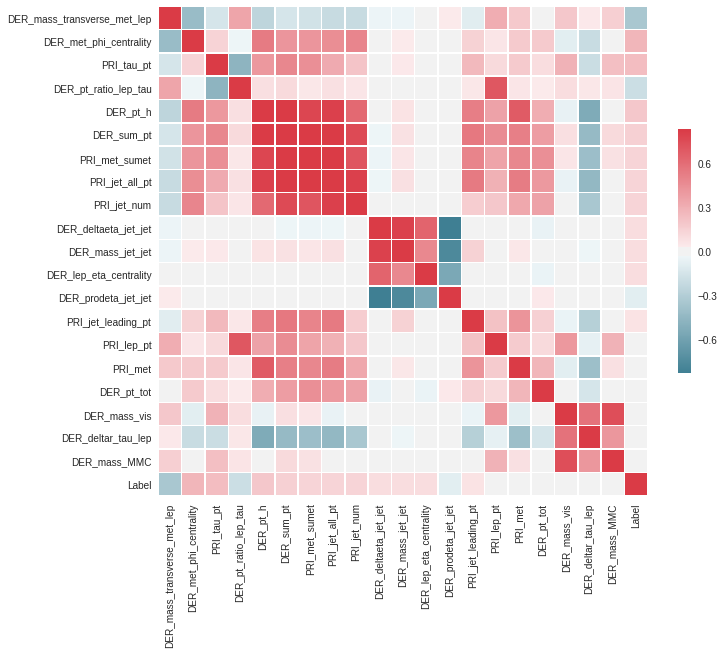

In [0]:
# Compute the correlation matrix
corr = df_scal[features1 + ["Label"]].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
df_shrink = df_scal[features2].copy()

In [0]:
df_shrink[:5]

,DER_mass_transverse_met_lep,DER_met_phi_centrality,PRI_tau_pt,DER_pt_ratio_lep_tau,DER_pt_h
0,1.461456,2.354233,0.563892,1.817099,0.439552
1,1.945627,2.369313,0.982238,0.984903,0.756350
2,4.588272,2.369313,0.542297,4.414308,0.559809
3,2.303501,0.108077,0.118106,2.730976,0.006504
4,0.478570,0.024296,0.366276,1.194432,0.257715


Посмотрим на различные распределения наиболее информативных признаков

In [0]:
df_shrink["Label"] = df["Label"]

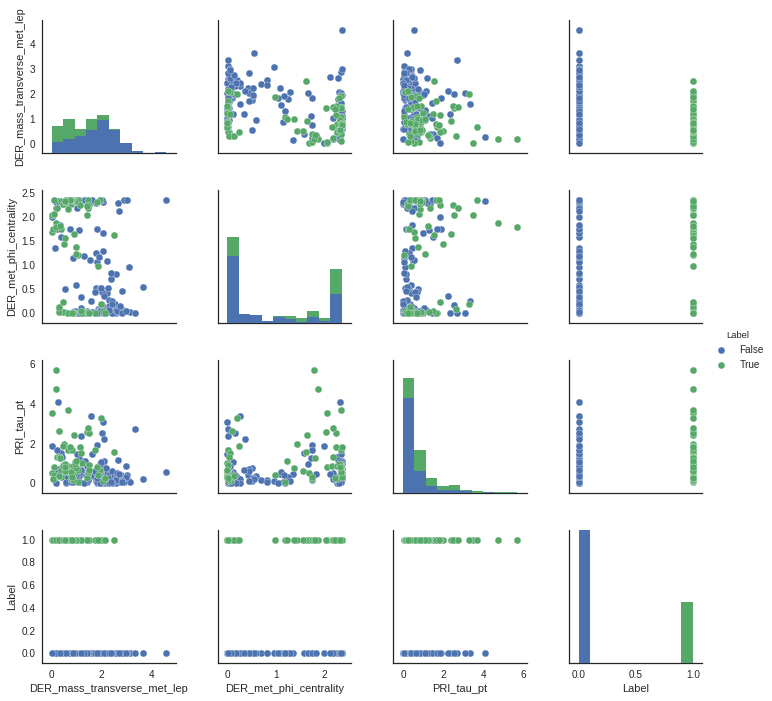

In [0]:
sns.pairplot(data=df_shrink[:200], vars = features2[:-2]+['Label'], hue="Label")

Здесь и далее чем выше признак, тем он сильнее (по модулю) скорреллирован с целевым.



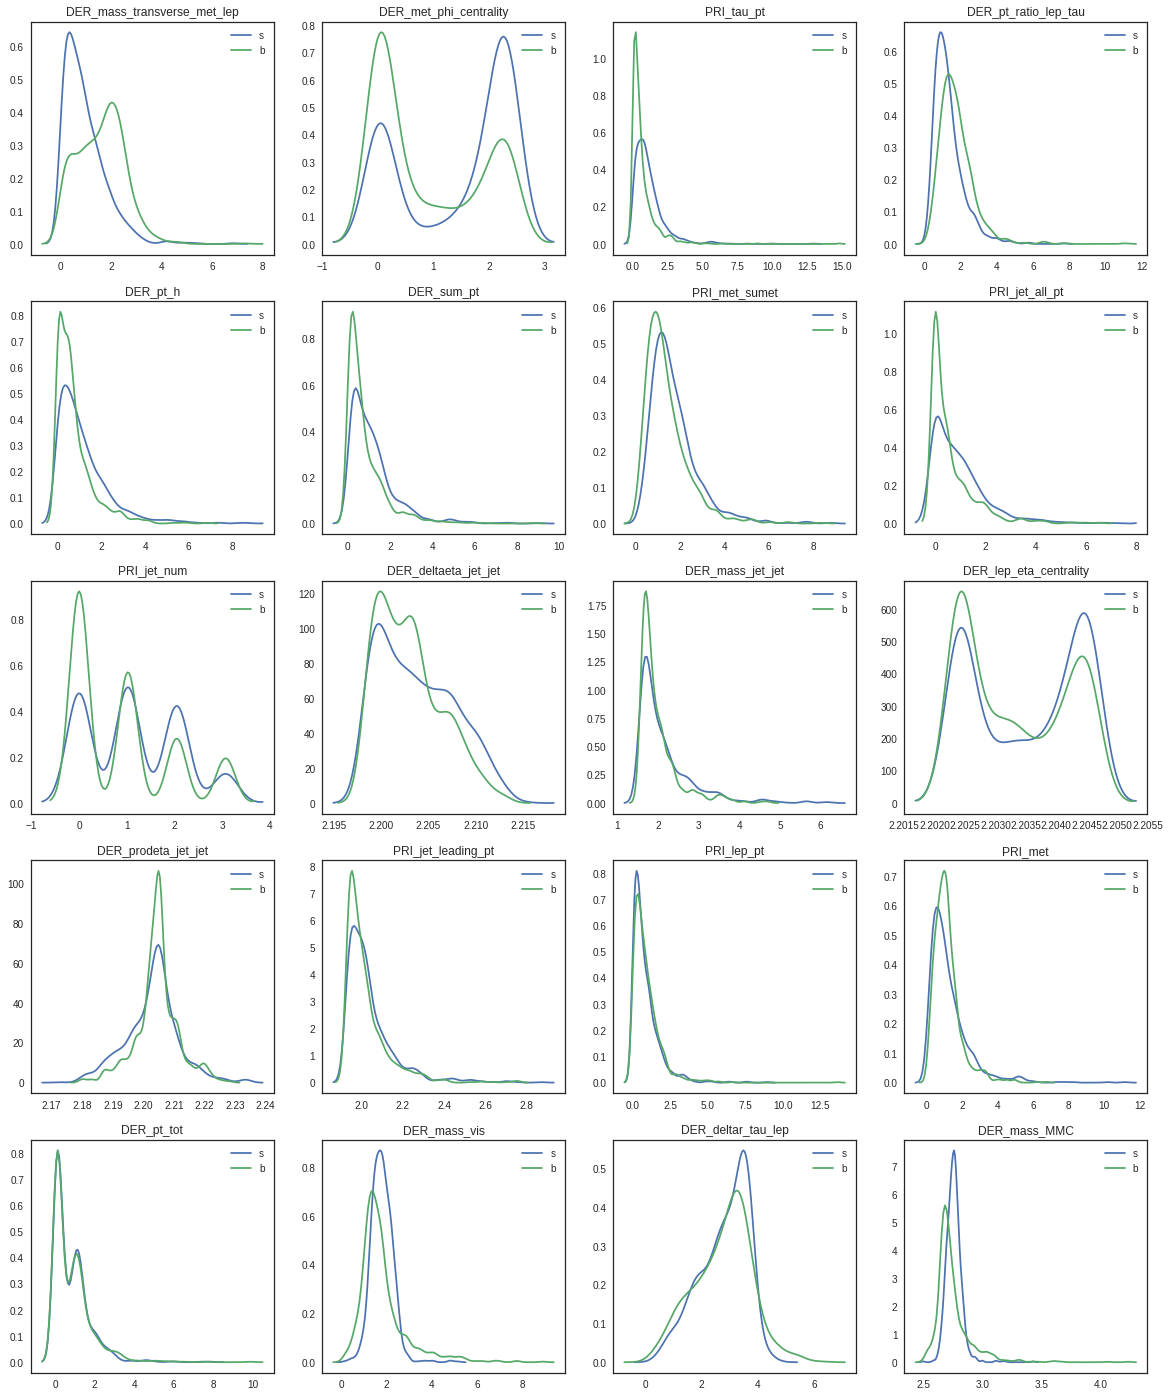

In [0]:
fig = plt.figure(figsize=(20,30))
ax = []
n = len(features1)
for i, feat in enumerate(features1):
    ax.append(fig.add_subplot(n//4+1, 4, i+1))
    sns.distplot(df_scal[df_scal.Label == True][[feat]][:1000], hist=False, kde=True, label = 's')
    sns.distplot(df_scal[df_scal.Label == False][[feat]][:1000], hist=False, kde=True, label = 'b')
    plt.title(feat)

Как видно, признак 'Weight' является артефактом, однозначно определяющим класс по значению. Этот признак мы, естественно, отбросим при обучении.

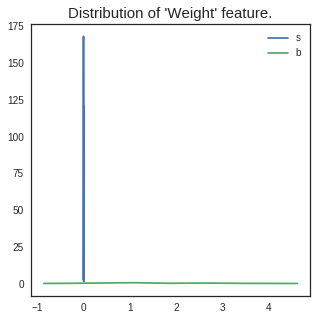

In [0]:
fig = plt.figure(figsize=(5,5))
sns.distplot(df_scal[df_scal.Label == True][['Weight']][:500], hist=False, kde=True, label = 's')
sns.distplot(df_scal[df_scal.Label == False][['Weight']][:500], hist=False, kde=True, label = 'b')
plt.title("Distribution of 'Weight' feature.", size=15)
plt.show()

Ящики с усами также показывают, что, хотя распределения классов по каждому признаку пересекаются, они различны

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


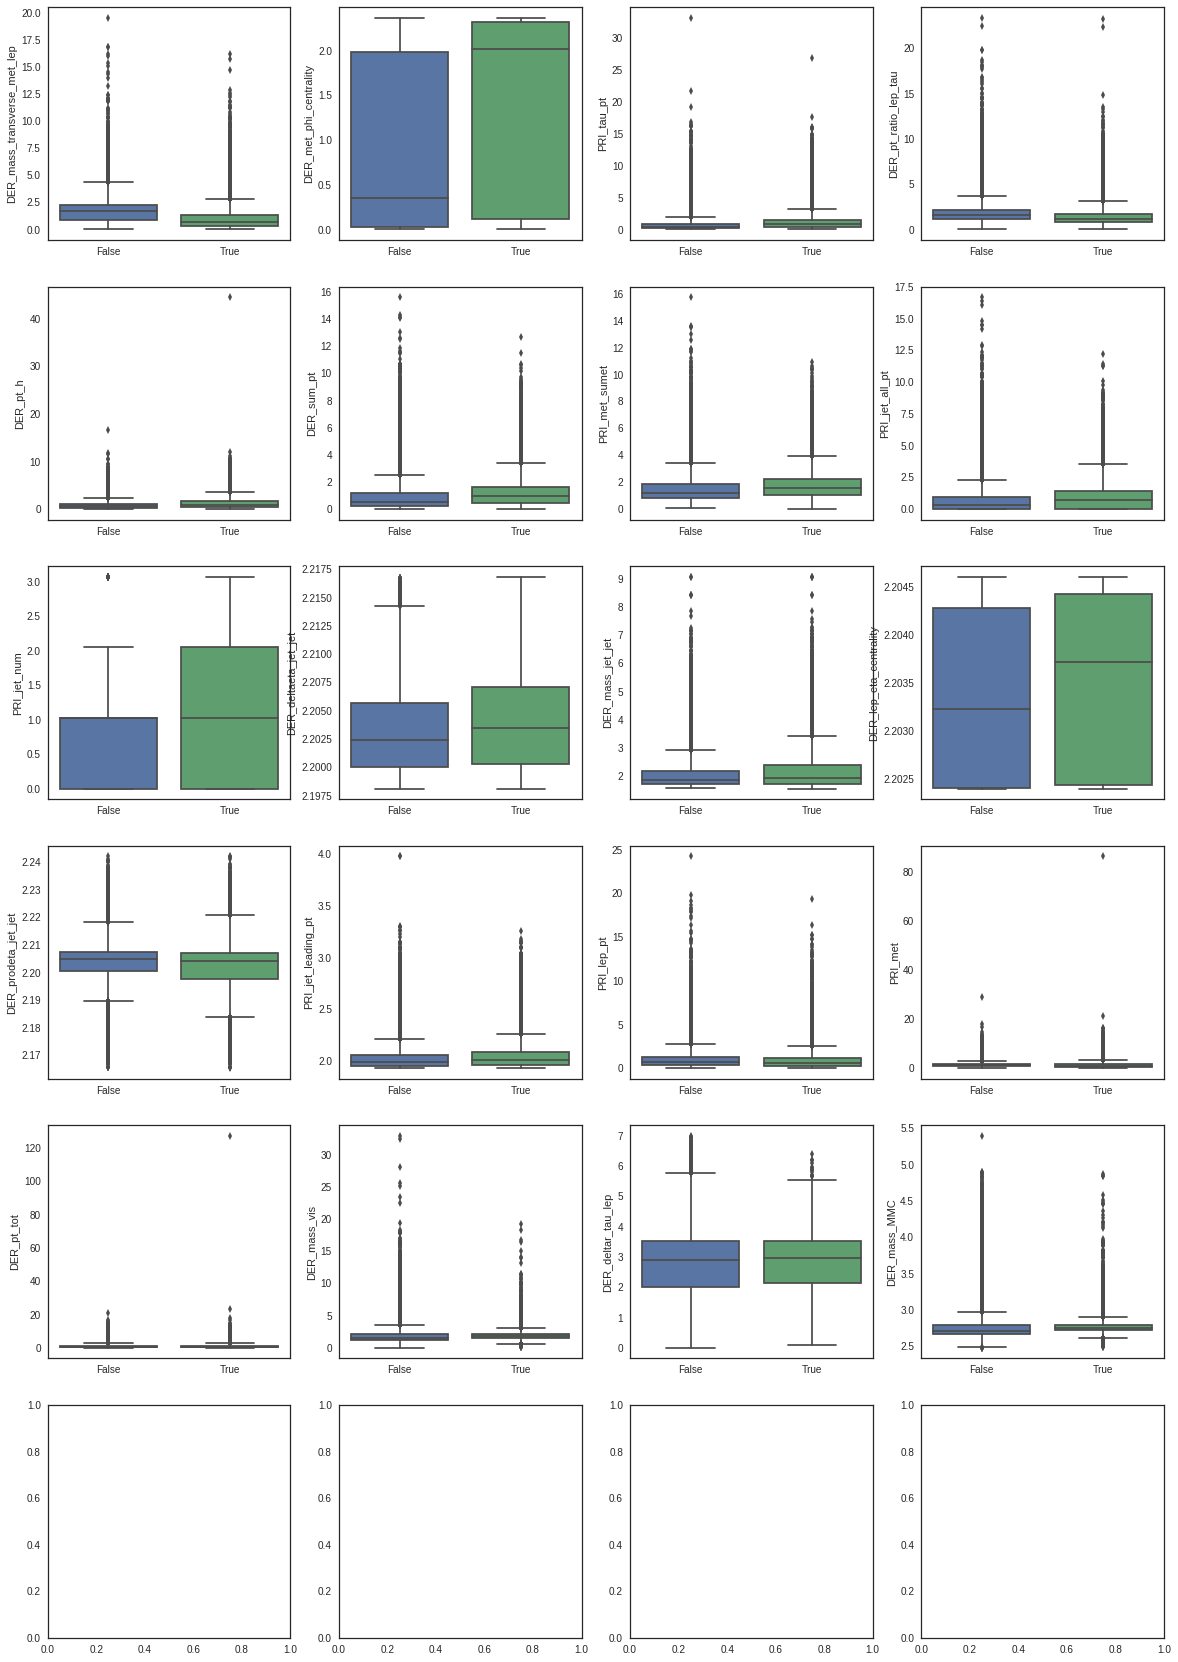

In [0]:
fig, axes = plt.subplots(nrows=n // 4 + 1, ncols=4, figsize=(20, 30))

for idx, feat in  enumerate(features1):
    sns.boxplot(x='Label', y=feat, data=df_scal, ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_xlabel('')

In [0]:
features_ = features1

In [0]:
X = df_train_raw[features_]
X = X.astype('float64')
y = df_train_raw.Label
y = (y == 's')
y_w = df_train_raw.Weight

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=103)
X_train, X_val, y_train_, y_val_ = train_test_split(X, y_w, test_size=0.33, random_state=103)

# для метрических классификаторов заменим значение -999. на среднее 
X_ = X.copy()
X_[X == -999] = None
X_.fillna(X.mean(), inplace=True)
X_train_, X_val_, y_train, y_val = train_test_split(X_, y, test_size=0.33, random_state=103)
X_train_.fillna(X_train_.mean(), inplace=True)
X_val_.fillna(X_val_.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Кросс-валидация:

In [0]:
cv = StratifiedKFold(n_splits=5, random_state=42)

### Метрика - ROC AUC

### Регрессия + классификация

В процессе перебора вариантов появилась странная идея: предсказывать сначала признак 'Weight', а затем уже целевую метку.

In [0]:
pipeline = Pipeline([
    #("pca", PCA()),
    ("scaler", StandardScaler()),
    ("reg", SGDRegressor())
    ])
parameters = param_grid = {
    #'pca__n_components': [5, 10, 20],
    #'clf__alpha': np.logspace(-4, 4, 5),
    #'clf__loss':['log', 'modified_huber'],
    'reg__penalty':['l1', 'l2']
}
lr_reg = GridSearchCV(pipeline, parameters, n_jobs=5, 
                   cv=KFold(n_splits=5, random_state=42), 
                   scoring='neg_mean_squared_error',
                   verbose=True, refit=True)

lr_reg.fit(X_train_, y_train_)
print()
print(lr_reg.best_score_)
print(lr_reg.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    7.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)



-1.88610461669646
{'reg__penalty': 'l1'}


In [0]:
lr_clf = SGDClassifier()
lr_clf.fit([[x] for x in y_train_], y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
print("Качество на train:")
roc_auc_score(y_train, lr_clf.predict(lr_reg.predict(X_train_).reshape(-1,1)))

Качество на train:


0.5519845350247568

Идея не увенчалась успехом

### Logistic Regression 

In [0]:
pipeline = Pipeline([
    ("pca", PCA()),
    ("scaler", StandardScaler()),
    ("clf", SGDClassifier())
    ])
parameters = param_grid = {
    'pca__n_components': [5, 20],
    #'clf__alpha': np.logspace(-4, 4, 5),
    #'clf__loss':['log', 'modified_huber'],
    'clf__penalty':['l1', 'l2']
}
lr_clf = GridSearchCV(pipeline, parameters, n_jobs=5, 
                   cv=cv, 
                   scoring='roc_auc',
                   verbose=True, refit=True)

lr_clf.fit(X_train_, y_train)
print()
print(lr_clf.best_score_)
print(lr_clf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:   15.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)



0.8016014016959391
{'clf__penalty': 'l2', 'pca__n_components': 20}


In [0]:
print("Качество на train:")
print(roc_auc_score(y_train, lr_clf.predict(X_train_)))

Качество на train:
0.7050782196219496


In [0]:
print("Качество на отложенной выборке:")
print(roc_auc_score(y_val, lr_clf.predict(X_val_)))

Качество на отложенной выборке:
0.7041783796142546


Поищем другой метод

### KNN

In [0]:
#n_neighbors = np.arange(1,9)
parameters = {
               "clf__n_neighbors":[5, 9]
            }

pipeline = Pipeline([
            ("scaler", StandardScaler()), 
            ("clf", KNeighborsClassifier(n_jobs=5))
        ])

knn_clf = GridSearchCV(pipeline, parameters, n_jobs=5, 
                   cv=cv, 
                   scoring='roc_auc',
                   verbose=True, refit=True)

#print(knn_clf.score)
knn_clf.fit(X_train_, y_train)
print()
print(knn_clf.best_score_)
print(knn_clf.best_params_)
#print(knn_clf.best_params_)
#y_pred = knn_clf.predict(X_train_)
#print("Training report:\n")
#print(classification_report(y_train, y_pred, target_names=['b', 's']))
#print("ROC_AUC score: {}".format(roc_auc_score(y_train, y_pred)))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed: 17.2min finished



0.8703195948404764
{'clf__n_neighbors': 9}


In [0]:
print("Качество на train:")
print(roc_auc_score(y_train, knn_clf.predict(X_train_)))

Качество на train:
0.8218083821503548


In [0]:
print("Качество на отложенной выборке:")
print(roc_auc_score(y_val, knn_clf.predict(X_val_)))

Качество на отложенной выборке:
0.7816221061472504


### RandomForestClassifier

In [0]:
param_grid = { 
          "max_depth":[4],
          "n_estimators":[150],
    }

rfc = GridSearchCV(RandomForestClassifier(), 
                   param_grid, 
                   n_jobs=5, 
                   cv=cv, 
                   verbose=2, 
                   scoring='roc_auc',
                   refit=True)
rfc.fit(X_train, y_train)
print()
print(rfc.best_score_)
print(rfc.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.4min finished



0.8708617193393487
{'max_depth': 4, 'n_estimators': 150}


In [0]:
print("Качество на train:")
print(roc_auc_score(y_train, rfc.predict(X_train)))

Качество на train:
0.7649369694324052


In [0]:
print("Качество на отложенной выборке:")
print(roc_auc_score(y_val, rfc.predict(X_val)))

Качество на отложенной выборке:
0.7637279613369465


### XGBClassifier

In [0]:
xgb_model = XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [4],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [200], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [42]}



xgb_clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=cv, 
                   scoring='roc_auc',
                   verbose=2, refit=True)

xgb_clf.fit(X_train, y_train)
print()
print(xgb_clf.best_score_)
print(xgb_clf.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.5min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.3min finished



0.902129685678095
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 200, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 42, 'silent': 1, 'subsample': 0.8}


In [0]:
print("Качество на train:")
print(roc_auc_score(y_train, xgb_clf.predict(X_train)))

Качество на train:
0.8085115943895025


In [0]:
print("Качество на отложенной выборке:")
print(roc_auc_score(y_val, xgb_clf.predict(X_val)))

Качество на отложенной выборке:
0.8034827680048342


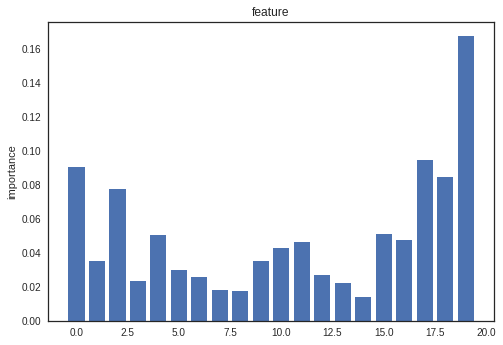

In [0]:
y_pos = np.arange(len(features_))
feat_imp = xgb_clf.best_estimator_.feature_importances_

plt.bar(y_pos, feat_imp, align='center')
#plt.xticks(y_pos, features)
plt.ylabel('importance')
plt.title('feature')
 
plt.show()

In [0]:
features1

['DER_mass_transverse_met_lep',
 'DER_met_phi_centrality',
 'PRI_tau_pt',
 'DER_pt_ratio_lep_tau',
 'DER_pt_h',
 'DER_sum_pt',
 'PRI_met_sumet',
 'PRI_jet_all_pt',
 'PRI_jet_num',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_lep_eta_centrality',
 'DER_prodeta_jet_jet',
 'PRI_jet_leading_pt',
 'PRI_lep_pt',
 'PRI_met',
 'DER_pt_tot',
 'DER_mass_vis',
 'DER_deltar_tau_lep',
 'DER_mass_MMC']

### Итог
Как было видно из данных, классы не отделимы  и взаимосвязи довольно сложные. Поэтому неудивительно, что линейные методы не дали приемлевого результата. Деревья позволили повысить качество классификации, однако всё-равно дают посредственный результат. Напрашивается вывод, что такими примитивными методами эту задачу нельзя решить хорошо. Также кажется, что генерация новых признаков здесь была бы уместна (например полиномиальных , всё-таки данные - физические). Наилучший результат дал XGBClassifier, что может говорить о том, что структура данных слишком сложная для исследования с помощью эвристических сетодов (линейных, SVM rbf, метрических...) . 
Также интересно, что самым информативным оказался признак DER_mass_MMC (что подтвердилось экспериментами, здесь не представленными), хотя он слабо скорреллирован с целевым признаком.
